In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer



# SGD One class SVM

## BGL

In [2]:
BGL_for_OneClass= pd.read_csv("data/clusters2/BGL_clusters2.csv")

In [3]:
BGL_for_OneClass.head()

,Unnamed: 0,timestamp,text,label,filename,clusters,tfidf_text,p-3-0,p-7-0,p-9-0,...,p-28-0,p-30-0,p-32-0,p-36-0,p-36-1,p-36-2,p-36-3,p-36-4,p-37-0,cluster2
0,0,1.117973e+12,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,False,R34-M0-NC-I:J18-U01,24,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
1,1,1.117973e+12,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,False,R30-M1-N4-I:J18-U11,24,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
2,2,1.117973e+12,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,False,R30-M1-N4-I:J18-U01,24,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
3,3,1.117973e+12,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,False,R30-M0-N4-I:J18-U11,24,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
4,4,1.117973e+12,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,False,R30-M0-N4-I:J18-U01,24,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [4]:
BGL_for_OneClass.fillna(0,inplace=True)

In [5]:
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDOneClassSVM

In [17]:
le = LabelEncoder()
y = le.fit_transform(BGL_for_OneClass['label'])

tfidf = TfidfVectorizer()
vectorized_text = tfidf.fit_transform(BGL_for_OneClass['tfidf_text'])
print(type(vectorized_text))
X = list(vectorized_text.toarray()) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



<class 'scipy.sparse._csr.csr_matrix'>


In [18]:
oneclass = SGDOneClassSVM().fit(X_train)
y_pred = oneclass.predict(X_test)
y_pred = [1 if i==-1 else 0 for i in y_pred]


Train Result:
Accuracy Score: 55.33%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.910129     0.056892   0.55332      0.483510      0.845214
recall         0.573133     0.312712   0.55332      0.442923      0.553320
f1-score       0.703348     0.096269   0.55332      0.399809      0.657162
support    28660.000000  2360.000000   0.55332  31020.000000  31020.000000
_______________________________________________
Confusion Matrix: 
 [[16426 12234]
 [ 1622   738]]

_______________________________________________
Recall Score: 
 0.31271186440677967
_______________________________________________
Roc AUC Score: 
 0.44292257560883297


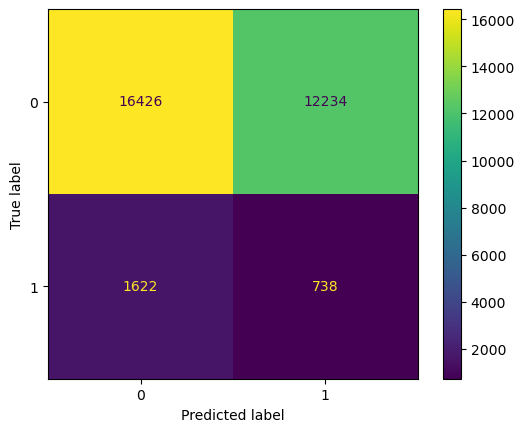

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, \
accuracy_score, confusion_matrix ,f1_score, precision_score, recall_score, auc
oneClass_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
print("Train Result:\n================================================")        
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{oneClass_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print("_______________________________________________")
print(f'Recall Score: \n {recall_score(y_test, y_pred)}')
print("_______________________________________________")
print(f'Roc AUC Score: \n {roc_auc_score(y_test, y_pred)}')

oneClass_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()



# Thunderbird

In [21]:
TB_for_OneClass= pd.read_csv("data/clusters2/Thunderbird_clusters2.csv")
TB_for_OneClass.fillna(0,inplace=True)


In [22]:
le = LabelEncoder()
y = le.fit_transform(TB_for_OneClass['label'])

tfidf = TfidfVectorizer()
vectorized_text = tfidf.fit_transform(TB_for_OneClass['tfidf_text'])
print(type(vectorized_text))
X = list(vectorized_text.toarray()) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)





<class 'scipy.sparse._csr.csr_matrix'>


In [23]:

oneclass = SGDOneClassSVM().fit(X_train)
y_pred = oneclass.predict(X_test)
y_pred = [1 if i==-1 else 0 for i in y_pred]


Train Result:
Accuracy Score: 51.78%
_______________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.920745    0.012060  0.517838      0.466402      0.875800
recall         0.539158    0.108108  0.517838      0.323633      0.517838
f1-score       0.680082    0.021699  0.517838      0.350890      0.647518
support    11377.000000  592.000000  0.517838  11969.000000  11969.000000
_______________________________________________
Confusion Matrix: 
 [[6134 5243]
 [ 528   64]]

_______________________________________________
Recall Score: 
 0.10810810810810811
_______________________________________________
Roc AUC Score: 
 0.32363302917930675


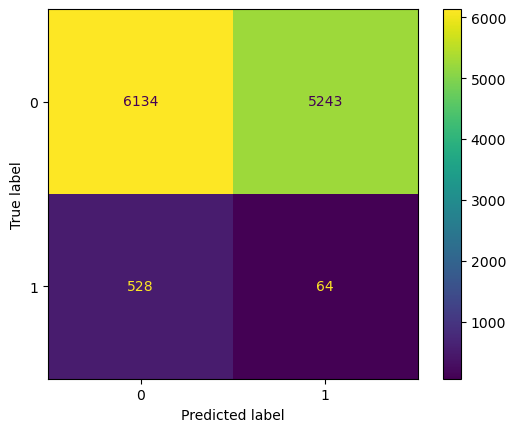

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, \
accuracy_score, confusion_matrix ,f1_score, precision_score, recall_score, auc
oneClass_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
print("Train Result:\n================================================")        
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{oneClass_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print("_______________________________________________")
print(f'Recall Score: \n {recall_score(y_test, y_pred)}')
print("_______________________________________________")
print(f'Roc AUC Score: \n {roc_auc_score(y_test, y_pred)}')

oneClass_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()